## Imports

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from numpy import load
from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt


#### Data import

In [2]:
# importing the dataset from the local directory

ir_3 = pd.read_csv('IR_3_accn.csv').set_index('time')
or_3 = pd.read_csv('OR_3_accn.csv').set_index('time')
ir_5 = pd.read_csv('IR_5_accn.csv').set_index('time')
or_5 = pd.read_csv('OR_5_accn.csv').set_index('time')
nf = pd.read_csv('Healthy_accn.csv').set_index('time')

In [3]:
 # chaniging the dataframe into numpy format
    
k_0 = ir_3.to_numpy()
k_1 = or_3.to_numpy()
k_2 = nf.to_numpy()
k_3 = ir_5.to_numpy()
k_4 = or_5.to_numpy()

# Now we have a total of 5 datasets in the numpy atrray format. 

In [4]:
len(k_0)/1000 # Just like k_0, every array gives at least 121 when divided by 1000

121.265

We are going to segment each dataset in 120 segment, each segment containing 1000 datapoints. This is done to have a good no of data to find the time domain gfeatures. 

## Data Preprocessing

In [5]:
# here we are going to segment the data so that we can find the time domain features for eaach segment

segmented_data = np.repeat(np.nan, 600*1000).reshape(600,1000)
num =0
data_arr = [k_0, k_1, k_2, k_3, k_4] # creating a array of arrays 
for i in data_arr:                   #using loop to loop over all the arrays and segment all at once 
    for j in range(120):           # We collect 120 segments from each array
        segmented_data[num,:] = i[j*1000:(j+1)*1000, 0] # taking 1000 datapoints at a time 
        num = num + 1

In [6]:
segmented_data.shape

(600, 1000)

In [7]:
segmented_data

array([[-8.30043510e-02, -1.95734331e-01,  2.33419281e-01, ...,
         3.06839960e-01,  3.55732934e-01,  2.15713852e-01],
       [-1.73968024e-01, -4.67163433e-01, -1.13217285e-01, ...,
         9.14509780e-02, -2.60708383e-01,  2.74515370e-02],
       [ 1.96871377e-01, -2.21723952e-01, -3.11875449e-01, ...,
         4.80645549e-01,  7.25760160e-01, -9.04763670e-02],
       ...,
       [ 1.84769960e-01, -5.52279440e-02,  4.62940120e-02, ...,
        -7.87810380e-02, -2.20911776e-01,  2.55835330e-02],
       [ 1.41724651e-01, -1.64871657e-01, -1.98576946e-01, ...,
        -2.15226547e-01, -1.05582830e-02,  2.63550998e-01],
       [ 6.61923150e-02, -1.77866467e-01,  4.06088000e-04, ...,
        -7.43140720e-02,  4.14209581e-01,  9.66489020e-02]])

## Computing time domain features

In [8]:
# skewness is a stastical feature and we are going to get it by writing the formula 

# most accepted fprmula for skewness 

def compute_skewness(x):
    
    N = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / N
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [9]:
# same wayfor kurtosis

def compute_kurtosis(x):
    
    N = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / N
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [10]:
# here thge feture is created 
feature_matrix_time = np.repeat(np.nan, 600*7).reshape((600,7)) # first a null numpy array is created and then we will replace
#the value one by one 
N = segmented_data.shape[1]
for i in np.arange(segmented_data.shape[0]): # i will iterate over all the rows 
    temp = segmented_data[i,:]
    feature_matrix_time[i,0] = np.max(temp)     # now each column is filled for all the ith row one by one . 1st row  
    feature_matrix_time[i,1] = np.min(temp)     # 2nd row - min
    feature_matrix_time[i,2] = np.mean(temp)
    feature_matrix_time[i,3] = np.std(temp, ddof = 1)
    feature_matrix_time[i,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix_time[i,5] = compute_skewness(temp)
    feature_matrix_time[i,6] = compute_kurtosis(temp)

In [11]:
feature_matrix_time.shape

(600, 7)

In [12]:
C = ['max','min','mean','sd','rms','skewness','kurtosis']
raw_data = pd.DataFrame(feature_matrix_time, columns = C)
raw_data

,max,min,mean,sd,rms,skewness,kurtosis
0,1.382973,-1.175218,0.015996,0.292141,0.292433,0.082279,2.316095
1,1.482708,-1.095463,0.015277,0.286502,0.286766,0.189660,2.754500
2,1.126325,-1.181228,0.015341,0.288121,0.288386,0.100776,2.501778
3,1.203807,-1.027890,0.015540,0.282663,0.282948,0.123284,2.110248
4,1.294121,-1.172294,0.015050,0.284348,0.284604,0.060281,2.419805
...,...,...,...,...,...,...,...
595,3.352255,-3.119567,0.015512,0.692403,0.692230,0.073976,5.200650
596,2.835305,-2.846270,0.017355,0.636073,0.635992,0.123782,4.525879
597,3.346570,-3.070836,0.016468,0.696495,0.696341,0.059132,4.799846
598,3.372559,-2.996928,0.015991,0.636658,0.636541,0.030605,4.649890


In [13]:
feature_matrix_time

array([[ 1.3829727 , -1.17521816,  0.01599645, ...,  0.2924326 ,
         0.08227936,  2.31609454],
       [ 1.48270786, -1.09546251,  0.0152767 , ...,  0.28676592,
         0.18966036,  2.75450026],
       [ 1.12632519, -1.18122826,  0.0153407 , ...,  0.28838559,
         0.10077618,  2.50177807],
       ...,
       [ 3.34656976, -3.07083613,  0.01646849, ...,  0.69634132,
         0.05913162,  4.79984592],
       [ 3.37255938, -2.99692814,  0.01599133, ...,  0.63654052,
         0.03060524,  4.64989045],
       [ 3.2750983 , -3.20240858,  0.01605631, ...,  0.72280287,
         0.0374447 ,  4.87955764]])

In [14]:
raw_data.to_csv('raw_data.csv', index=False) # Here, we have saved the data locally in csv format

We then add a new column manually in excel. this column will be the last column that will contain the categorical value., which finally will help to identify the pattern. 

In [15]:
final_data = pd.read_csv('final_data_5.csv')
final_data

,max,min,mean,sd,rms,skewness,kurtosis,fault
0,1.382973,-1.175218,0.015996,0.292141,0.292433,0.082279,2.316095,ir_3
1,1.482708,-1.095463,0.015277,0.286502,0.286766,0.189660,2.754500,ir_3
2,1.126325,-1.181228,0.015341,0.288121,0.288386,0.100776,2.501778,ir_3
3,1.203807,-1.027890,0.015540,0.282663,0.282948,0.123284,2.110248,ir_3
4,1.294121,-1.172294,0.015050,0.284348,0.284604,0.060281,2.419805,ir_3
...,...,...,...,...,...,...,...,...
595,3.211343,-4.142096,0.004107,0.475398,0.475178,-0.690432,19.797039,or_5
596,5.209701,-5.024931,0.004703,0.607363,0.607078,0.393820,18.732724,or_5
597,3.921184,-3.848494,0.004480,0.475472,0.475255,-0.353512,21.360337,or_5
598,4.265547,-4.106766,0.004471,0.600897,0.600613,0.192449,12.759407,or_5


In [16]:
final_data['fault'].value_counts()

or_5    120
ir_5    120
ir_3    120
or_3    120
nf      120
Name: fault, dtype: int64

In [17]:
final_data.dtypes

max         float64
min         float64
mean        float64
sd          float64
rms         float64
skewness    float64
kurtosis    float64
fault        object
dtype: object

##  Applying ML 

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [19]:
df = final_data

In [20]:
df. columns

Index(['max', 'min', 'mean', 'sd', 'rms', 'skewness', 'kurtosis', 'fault'], dtype='object')

In [21]:

x = df[['max', 'min', 'rms', 'skewness', 'kurtosis']]
y = df.fault
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=59)
    


### Applying different classification techniques 

In [22]:
# Using decision Tree using default params 

DT = DecisionTreeClassifier()

# Performing training
DT.fit(X_train, Y_train)

y_pred = DT.predict(X_test)

# creating confusion matrix 
print(confusion_matrix(Y_test, y_pred))

print ("Accuracy : ", accuracy_score(Y_test,y_pred)*100)
DT_score = round(accuracy_score(Y_test,y_pred)*100,2)


[[36  0  0  0  0]
 [ 0 27  0  0  0]
 [ 0  0 28  0  0]
 [ 0  1  0 41  0]
 [ 0  1  0  3 43]]
Accuracy :  97.22222222222221


In [23]:
# Using KNN

RF=RandomForestClassifier()
RF.fit(X_train, Y_train) # training and fitting 
y_pred = RF.predict(X_test) # prediction 
print(confusion_matrix(Y_test, y_pred))
print ("Accuracy : ", accuracy_score(Y_test,y_pred)*100) # accuracy 
RF_score = round(accuracy_score(Y_test,y_pred)*100,2)
     


[[36  0  0  0  0]
 [ 0 27  0  0  0]
 [ 0  0 28  0  0]
 [ 0  1  0 41  0]
 [ 0  0  0  1 46]]
Accuracy :  98.88888888888889


In [24]:

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors= 9)

#Train the model
knn.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#print(confusion_matrix(Y_test, y_pred))
print ("Accuracy : ", accuracy_score(Y_test,y_pred)*100)
KNN_score = round(accuracy_score(Y_test,y_pred)*100,2)


Accuracy :  96.11111111111111


In [25]:
from sklearn.linear_model import LogisticRegression
# define the multinomial logistic regression model
lr= LogisticRegression(multi_class='multinomial')
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print ("Accuracy : ", accuracy_score(Y_test,y_pred)*100)
Lr_score = round(accuracy_score(Y_test,y_pred)*100,2)
Lr_score

[[36  0  0  0  0]
 [ 0 26  0  0  1]
 [ 0  0 28  0  0]
 [ 0  1  0 41  0]
 [ 0  2  0  1 44]]
Accuracy :  97.22222222222221


C:\Users\swapn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


97.22

In [26]:
a = ['LR','KNN','RF','DT']
b= [Lr_score, KNN_score, RF_score, DT_score ]

<ipython-input-27-c64453a16676>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(a, b,  width = 0.4, color = my_colors)


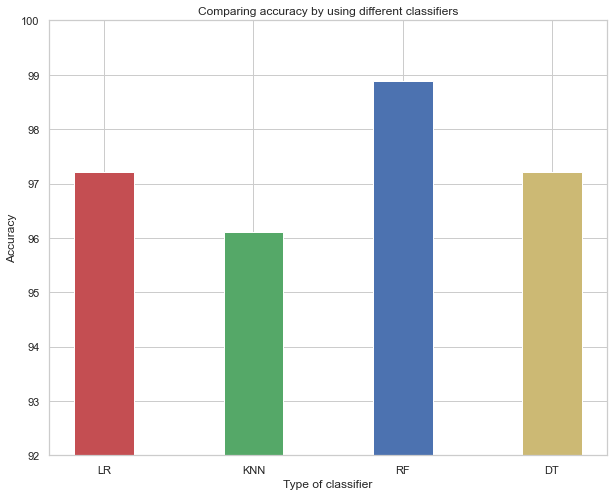

In [27]:
fig = plt.figure(figsize = (10, 8))
sns.set_theme(style="whitegrid")

my_colors = 'rgby'
plt.bar(a, b,  width = 0.4, color = my_colors)
plt.ylim(92, 100)
plt.xlabel("Type of classifier")
plt.ylabel("Accuracy")
plt.title("Comparing accuracy by using different classifiers")

#Plot the data:

plt.show()